In this notebook I implement a neural network from scratch using only NumPy and test it on the half moons dataset.

The general steps of fitting the model are:
1. initialize parameters
* forward propagation
* backward propagation
    * calculate gradients
    * update parameters
    
The model uses $tanh$ activations, except the last activation which is $sigmoid$.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Generate and plot half moon dataset

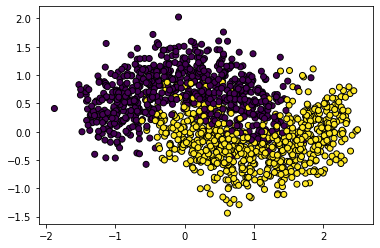

In [2]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples,
                                      noise=.3, random_state=1)

X = noisy_moons[0]

Y = noisy_moons[1].reshape(n_samples,1)

plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], 
           edgecolors='k');

### Helper functions

In [3]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Parameters:
    ----------
    x : a scalar or numpy array

    Returns:
    ----------
    s : sigmoid(x)
    
    """
    s = 1/(1+np.exp(-x))
    return s

In [4]:
def plot_decision_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], cmap=plt.cm.Spectral, edgecolors='black')

### Initialize parameters

In [5]:
# define example model
hidden_layer_sizes = [8, 5, 3]
inp_size = X.shape[1]
out_size = Y.shape[1]
n_layers = len(hidden_layer_sizes)+1

In [6]:
def initialize_parameters(inp_size, hidden_layer_sizes, out_size):
    """
    Intialize the weights and biases of the model

    Parameters:
    ----------
    inp_size : input size
    hidden_layer_sizes : list with number of neurons
        in each hidden layer
    out_size : output size

    Returns:
    ----------
    parameters : a dictionary containing the 
        initialized weights and biases
    
    """
    np.random.seed(2)
    sizes = [inp_size]+hidden_layer_sizes+[out_size]
    parameters = {}
    for l,s in enumerate(sizes[:-1]):
        parameters['w'+str(l+1)] = np.random.randn(sizes[l],sizes[l+1])*np.sqrt(1/sizes[l])
        parameters['b'+str(l+1)] = np.zeros((1,sizes[l+1]))
    return parameters

In [7]:
p = initialize_parameters(inp_size, hidden_layer_sizes, out_size)
p

{'w1': array([[-0.2946923 , -0.03978666, -1.51051875,  1.15984661, -1.26815046,
         -0.59520527,  0.35559086, -0.88055165],
        [-0.74808519, -0.64276545,  0.38993689,  1.62083583,  0.02937279,
         -0.79049266,  0.38117179, -0.42154857]]),
 'b1': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'w2': array([[-6.76365191e-03,  4.15425665e-01, -2.64412310e-01,
          3.19090808e-03, -3.10458023e-01],
        [-5.53078313e-02,  9.07113532e-02, -3.49586185e-01,
         -1.19791655e-01, -8.35036649e-02],
        [-2.25445092e-01, -4.19884351e-01, -5.02476169e-01,
         -5.42687469e-02, -9.51260005e-02],
        [ 7.88907294e-01, -8.60820332e-01,  3.98548380e-02,
          1.30971922e-01,  4.80703162e-01],
        [ 1.77433317e-01, -2.98474617e-01,  3.45120138e-06,
          1.91750591e-01, -1.10841886e-01],
        [ 2.72593814e-01, -6.60469785e-01,  6.12066208e-01,
          5.18902537e-01, -1.18679861e-01],
        [ 2.16141605e-01,  1.69601654e-02, -2.93143593e-01,
      

### Forward pass

Example of a computational graph for a network with 4 layers

<img src="nn-from-scratch-graph4.png">

In [8]:
def forward_prop(X, parameters):
    """
    Perform a forward propagation through the model

    Parameters:
    ----------
    X : the input array
    parameters : a dictionary containing the 
        weights and biases
    

    Returns:
    ----------
    activations : a dictionary containing the 
        activations for each layer 
    
    """
    
    n_layers = int(len(parameters)/2)
    activations = {}
    activations['a0'] = X
    for l in range(n_layers):     #***  for k in parameters:
        if l==(n_layers-1):
            activations['a'+str(l+1)] = sigmoid(np.matmul(activations['a'+str(l)],
                                                          parameters['w'+str(l+1)]) + \
                                                parameters['b'+str(l+1)])
        else:
            activations['a'+str(l+1)] = np.tanh(np.matmul(activations['a'+str(l)],
                                                          parameters['w'+str(l+1)]) + \
                                                parameters['b'+str(l+1)])
    return activations

In [9]:
a = forward_prop(X, p)
a

{'a0': array([[ 1.42517428,  0.7977905 ],
        [ 0.96602194,  0.50451284],
        [ 1.73426093, -0.5548347 ],
        ...,
        [ 1.39390351, -0.75456056],
        [ 0.71850097,  0.67188814],
        [ 0.94428536, -0.49244099]]),
 'a1': array([[-0.76856123, -0.51498837, -0.95095467, ..., -0.90126522,
          0.67007222, -0.92034031],
        [-0.5797578 , -0.34760605, -0.85174256, ..., -0.75036726,
          0.48981327, -0.78692699],
        [-0.09571581,  0.27995029, -0.99314143, ..., -0.53251456,
          0.38438947, -0.85996663],
        ...,
        [ 0.15250389,  0.40494241, -0.98366671, ..., -0.22904763,
          0.20509176, -0.72080577],
        [-0.61340751, -0.43045354, -0.67687024, ..., -0.74373139,
          0.47118871, -0.72395713],
        [ 0.08987105,  0.2719368 , -0.92438909, ..., -0.17107381,
          0.1470018 , -0.55384054]]),
 'a2': array([[ 0.71045013,  0.18598003,  0.17506266, -0.4839076 ,  0.70785318],
        [ 0.68096978,  0.11702589,  0.15756269, -

#### Cost function

First we define the loss function

\begin{equation}
   loss_i = - (y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i}))
\end{equation}

Then the cost function across all observations is the average of the loss function ($m$ is the number of observations):

\begin{equation}
   cost = \frac{1}{m} \sum_{i=1}^{m} - (y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i}))
\end{equation}

In the implementation below I added the option to use regularization, with a parameter $\lambda$. So the cost function becomes:

\begin{equation}
   cost = \frac{1}{m} \sum_{i=1}^{m} loss_i + \color{blue} {\frac{\lambda}{2m} \sum_{l=1}^{N}||{W_l}||^2}
\end{equation}

If we set $\lambda = 0$ the cost function remains unchanged.

In [10]:
def compute_cost(Y, Y_h, parameters, l2_lambda=0):
    """
    Perform a forward propagation through the model

    Parameters:
    ----------
    Y : true labels array
    Y_hat : estimated labels array    

    Returns:
    ----------
    cost : cross-entropy cost 
    
    """
    n_layers = int(len(parameters)/2)
    penalty = 0
    n_samples = Y.shape[0]
    for l in range(n_layers):
        penalty = penalty + (np.dot(parameters['w'+str(l+1)], parameters['w'+str(l+1)].T).sum())
    logprobs = -(np.multiply(np.log(Y_h), Y) + np.multiply((1 - Y), np.log(1 - Y_h)))
    cost =  np.mean(logprobs) + (l2_lambda/(2*Y.shape[0]))*penalty
    return cost

In [11]:
compute_cost(Y, a['a'+str(n_layers)], p, l2_lambda=0)

0.760688483962489

#### Backpropagation

Based on the example with 4 layers we can calculate the derivatives

\begin{equation*}
\frac{ dloss} {da_4} = \frac{-y}{a_4}+\frac{1-y}{1-a_4}
\end{equation*}

\begin{equation*}
\frac{ da_4} {dz_4} = (a_4)(1-a_4)
\end{equation*}

\begin{equation*}
\frac{ dz_4} {dw_4} = a_3
\end{equation*}

\begin{equation*}
\frac{ dz_4} {da_3} = w_4
\end{equation*}

\begin{equation*}
\frac{ dz_4} {db_4} = 1
\end{equation*}

\begin{equation*}
\frac{ da_3} {dz_3} = (1-a_3^2)
\end{equation*}

\begin{equation*}
\frac{ dz_3} {dw_3} = a_2
\end{equation*}

\begin{equation*}
\frac{ dz_3} {da_2} = w_3
\end{equation*}

\begin{equation*}
\frac{ dz_3} {db_3} = 1
\end{equation*}

\begin{equation*}
\frac{ da_2} {dz_2} = (1-a_2^2)
\end{equation*}

\begin{equation*}
\frac{ dz_2} {dw_2} = a_1
\end{equation*}

\begin{equation*}
\frac{ dz_2} {da_1} = w_2
\end{equation*}

\begin{equation*}
\frac{ dz_2} {db_2} = 1
\end{equation*}

\begin{equation*}
\frac{ da_1} {dz_1} = 1-a_1^2
\end{equation*}

\begin{equation*}
\frac{ dz_1} {dw_1} = x
\end{equation*}

\begin{equation*}
\frac{ dz_1} {db_1} = 1
\end{equation*}

So for example the weights gradients are:

\begin{equation*}
\frac{ dloss} {dw_1} = \frac{ dloss} {da_4} \frac{ da_4} {dz_4} \frac{ dz_4} {da_3} \frac{ da_3} {dz_3} \frac{ dz_3} {da_2} \frac{ da_2} {dz_2} \frac{ dz_2} {da_1} \frac{ da_1} {dz_1} \frac{ dz_1} {dw_1} = (\frac{-y}{a_4}+\frac{1-y}{1-a_4})(a_4)(1-a_4)w_4(1-a_3^2)w_3(1-a_2^2)w_2(1-a_1^2) x
\end{equation*}

\begin{equation*}
\cdots
\end{equation*}

\begin{equation*}
\frac{ dloss} {dw_4} = \frac{ dloss} {da_4} \frac{ da_4} {dz_4} \frac{ dz_4} {dw_4} = (\frac{-y}{a_4}+\frac{1-y}{1-a_4})(a_4)(1-a_4)a_3 = (a_4-y) a_3
\end{equation*}

Generalizing to $N$ layers, for any layer $K<N$:

\begin{equation*}
\frac{ dloss} {dw_K} = (a_N-y)a_{K-1}\prod_{n=K+1}^{N}w_{n}(1-a_{n-1}^2) 
\end{equation*}
\begin{equation*}
\frac{ dloss} {db_K} = (a_N-y)\prod_{n=K+1}^{N}w_n(1-a_{n-1}^2) 
\end{equation*}

For the last layer $N$:

\begin{equation*}
\frac{ dloss} {dw_N} = (a_N-y)a_{N-1}
\end{equation*}
\begin{equation*}
\frac{ dloss} {db_N} = (a_N-y)
\end{equation*}

In matrix notation the formulas needed for backprop are:

\begin{equation*}
dW_4 = A_3^T(A_4-Y)
\end{equation*}

\begin{equation*}
dW_3 = A_2^T \left[ \left((A_4-Y)W_4^T \right) \odot (1-A_3^2) \right]
\end{equation*}

\begin{equation*}
dW_2 = A_1^T \bigg[ \Big[ \left[ \left((A_4-Y)W_4^T \right) \odot (1-A_3^2) \right]W_3^T \Big] \odot (1-A_2^2) \bigg]
\end{equation*}

\begin{equation*}
dW_1 = X^T \Bigg\{ \bigg\{ \bigg[ \Big[ \left[ \left((A_4-Y)W_4^T \right) \odot (1-A_3^2) \right]W_3^T \Big] \odot (1-A_2^2) \bigg] W_2^T \bigg\} \odot (1-A_1^2) \Bigg\}
\end{equation*}

Using the formulas above we define the backprop function. In addition, I implement backprop so it allows l2 regularization. The regularization parameter $\lambda$ will change the formula of the gradient as shown below ($m$ is the number of observations):

\begin{equation*}
    dW_k = \cdots + \color{blue}{\frac{\lambda}{m} W_k}
\end{equation*}

In [12]:
def backprop(parameters, activations, Y, l2_lambda=0, learning_rate=1.2):
    """
    Perform a back propagation through the model,
    calculating the gradients and updating the parameters

    Parameters:
    ----------
    parameters : a dictionary containing the 
        current weights and biases
    activations : a dictionary containing the 
        current activations for each layer
    Y : the output array
    l2_lambda : regularization parameter
    learning_rate : learning rate parameter

    Returns:
    ----------
    parameters_new : a dictionary containing the 
        updated weights and biases
    
    """
    
    n_layers = int(len(parameters)/2)
    n_samples = Y.shape[0]
    parameters_new = {}
    dz_last = (activations['a'+str(n_layers)]-Y)
    dw_last = (np.dot(activations['a'+str(n_layers-1)].T ,dz_last )/n_samples) + \
            l2_lambda*parameters['w'+str(n_layers)]/n_samples
    db_last = dz_last.mean(axis=0, keepdims=True)
    parameters_new['w'+str(n_layers)] = parameters['w'+str(n_layers)] - learning_rate*dw_last
    parameters_new['b'+str(n_layers)] = parameters['b'+str(n_layers)] - learning_rate*db_last
    term_1 = np.dot(dz_last, parameters['w'+str(n_layers)].T)
    for k in reversed(range(1, n_layers)): #loop over layers -1-->0 
        #print(k)
        #np.dot(parameters['w'+str(layers+1)], dz_last.T)
        #Zk = term_1*(1-np.power(activations['a'+str(k+1)],2)).T
        term_1 = term_1*(1-np.power(activations['a'+str(k)],2))
        dwk = np.dot(activations['a'+str(k-1)].T, term_1)/n_samples + \
            l2_lambda*parameters['w'+str(k)]/n_samples
        dbk = term_1.mean(axis = 0, keepdims=True)
        parameters_new['w'+str(k)] = parameters['w'+str(k)] - learning_rate*dwk
        parameters_new['b'+str(k)] = parameters['b'+str(k)] - learning_rate*dbk    
        term_1 = np.dot(term_1, parameters['w'+str(k)].T)

        
    return parameters_new

In [13]:
backprop(p, a, Y, l2_lambda=0, learning_rate=1.2)

{'w4': array([[ 0.30354991],
        [-0.23358489],
        [ 0.00780759]]),
 'b4': array([[0.01607102]]),
 'w3': array([[-0.27234401,  0.22136451,  0.09772076],
        [-0.74894559, -0.23146145, -0.05098599],
        [ 0.00927231,  0.13067479, -0.90969873],
        [-0.00300671, -0.29010541, -0.64612127],
        [ 0.22657563,  0.33346225, -0.29302147]]),
 'b3': array([[ 0.00938   , -0.00593085,  0.00079475]]),
 'w2': array([[-0.01561976,  0.40546069, -0.26877809,  0.00638071, -0.31003485],
        [-0.07065398,  0.06576872, -0.35830151, -0.11430381, -0.08232283],
        [-0.19203261, -0.36379967, -0.48273821, -0.06615859, -0.09746886],
        [ 0.79068757, -0.8682057 ,  0.03942509,  0.13025142,  0.48113132],
        [ 0.2045481 , -0.25248456,  0.01622575,  0.18211   , -0.11263952],
        [ 0.27200957, -0.65466474,  0.61281448,  0.51916421, -0.11894608],
        [ 0.21411733,  0.00898034, -0.29508613,  0.0317014 ,  0.35403883],
        [-0.1208029 , -0.10548533, -0.01737996,  0.1

In [14]:
def nn_fit(X, Y, n_iterations):
    # add methods create(sizes), fit(l2,lrate, iter) , predict, score
    parameters = initialize_parameters(sizes)
    n_layers = int(len(parameters)/2)
    for i in range(0, n_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        activations = forward_prop(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(Y, activations['a'+str(n_layers)])

        parameters = backprop(parameters, activations, Y, 1.2)

        # Print the cost every 10000 iterations
        if i % 10000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

In [15]:
class NeuralNetwork():
    def __init__(self, hidden_layer_sizes):
        self.hidden_layer_sizes = hidden_layer_sizes
        
    def fit(self, X, Y, n_iterations, l2_lambda=0, learning_rate=1.2):
        self.parameters = initialize_parameters(X.shape[1], self.hidden_layer_sizes, Y.shape[1])
        self.n_layers = int(len(self.parameters)/2)
        for i in range(0, n_iterations):            
            activations = forward_prop(X, self.parameters)
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = compute_cost(Y, activations['a'+str(self.n_layers)], self.parameters, l2_lambda=l2_lambda)

            self.parameters = backprop(self.parameters, activations, Y,
                                       l2_lambda=l2_lambda, learning_rate=learning_rate)

            # Print the cost every 1000 iterations
            if i % 1000 == 0:
                print ("Cost after iteration %i: %f" % (i, cost))
        return self
    
    def predict(self, X):
        if hasattr(self, 'parameters'):
            # 0.5 as treshold
            return np.round(forward_prop(X, self.parameters)['a'+str(self.n_layers)])
        else:
            return ("This instance is not fitted yet. Call 'fit' with "
           "appropriate arguments before using this estimator.")
        #return forward_prop(X, self.parameters)

In [16]:
nn = NeuralNetwork(hidden_layer_sizes=[8, 5, 3]).fit(X, Y, 10000)

Cost after iteration 0: 0.760688
Cost after iteration 1000: 0.207103
Cost after iteration 2000: 0.200641
Cost after iteration 3000: 0.195455
Cost after iteration 4000: 0.192148
Cost after iteration 5000: 0.189569
Cost after iteration 6000: 0.187459
Cost after iteration 7000: 0.185722
Cost after iteration 8000: 0.184173
Cost after iteration 9000: 0.182370


In [17]:
Y_hat = nn.predict(X)

In [18]:
print ('Accuracy: %d' % float((np.dot(Y.T, Y_hat) + np.dot(1 - Y.T, 1 - Y_hat)) / float(Y.size) * 100) + '%')

Accuracy: 92%


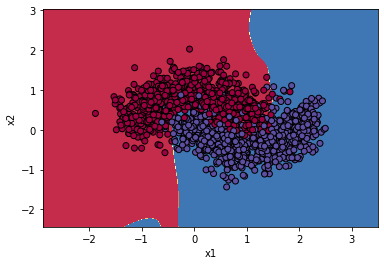

In [19]:
plot_decision_boundary(lambda x: nn.predict(x), X, Y)

# Overfitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

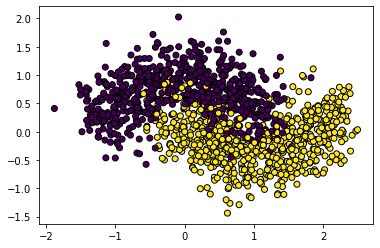

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], 
           edgecolors='k');

1. Overfitted model

In [23]:
nn_ovr = NeuralNetwork(hidden_layer_sizes=[10, 20, 30]).fit(X_train, Y_train, 10000, l2_lambda=0, learning_rate=2)

Cost after iteration 0: 0.764797
Cost after iteration 1000: 0.198301
Cost after iteration 2000: 0.189329
Cost after iteration 3000: 0.173083
Cost after iteration 4000: 0.159633
Cost after iteration 5000: 0.159427
Cost after iteration 6000: 0.139492
Cost after iteration 7000: 0.125758
Cost after iteration 8000: 0.099792
Cost after iteration 9000: 0.096103


In [24]:
Y_hat_train = nn_ovr.predict(X_train)

In [25]:
print ('Train accuracy overfitted: %d' % float((np.dot(Y_train.T, Y_hat_train) + np.dot(1 - Y_train.T, 1 - Y_hat_train)) / \
                              float(Y_train.size) * 100) + '%')

Train accuracy overfitted: 95%


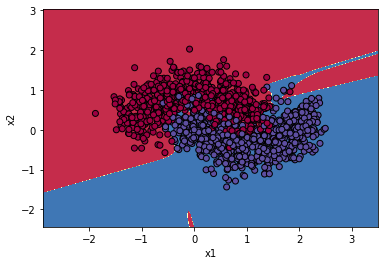

In [26]:
plot_decision_boundary(lambda x: nn_ovr.predict(x), X_train, Y_train)

In [27]:
Y_hat_test = nn_ovr.predict(X_test)

In [28]:
print ('Test accuracy overfitted: %d' % float((np.dot(Y_test.T, Y_hat_test) + np.dot(1 - Y_test.T, 1 - Y_hat_test)) / \
                              float(Y_test.size) * 100) + '%')

Test accuracy overfitted: 88%


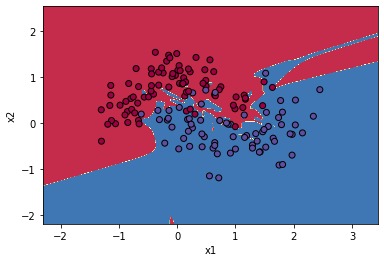

In [29]:
plot_decision_boundary(lambda x: nn_ovr.predict(x), X_test, Y_test)

2. Regularization

In [30]:
nn_reg = NeuralNetwork(hidden_layer_sizes=[10, 20, 30]).fit(X_train, Y_train, 10000, l2_lambda=0.5, learning_rate=2)

Cost after iteration 0: 0.777771
Cost after iteration 1000: 0.224456
Cost after iteration 2000: 0.220963
Cost after iteration 3000: 0.219444
Cost after iteration 4000: 0.217741
Cost after iteration 5000: 0.215537
Cost after iteration 6000: 0.213691
Cost after iteration 7000: 0.213045
Cost after iteration 8000: 0.213561
Cost after iteration 9000: 0.213988


In [31]:
Y_hat_train = nn_reg.predict(X_train)

In [32]:
print ('Train accuracy regularized: %d' % float((np.dot(Y_train.T, Y_hat_train) + np.dot(1 - Y_train.T, 1 - Y_hat_train)) / \
                              float(Y_train.size) * 100) + '%')

Train accuracy regularized: 92%


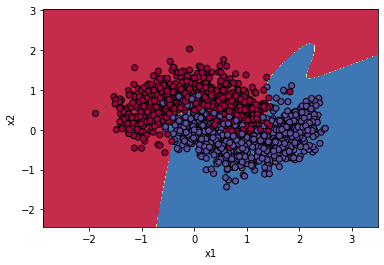

In [33]:
plot_decision_boundary(lambda x: nn_reg.predict(x), X_train, Y_train)

In [34]:
Y_hat_test = nn_reg.predict(X_test)

In [35]:
print ('Test accuracy regularized: %d' % float((np.dot(Y_test.T, Y_hat_test) + np.dot(1 - Y_test.T, 1 - Y_hat_test)) / \
                              float(Y_test.size) * 100) + '%')

Test accuracy regularized: 90%


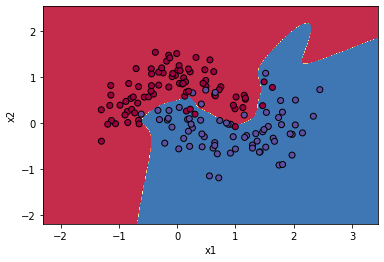

In [36]:
plot_decision_boundary(lambda x: nn_reg.predict(x), X_test, Y_test)